In [2]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeRegressor
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [3]:
#loading the data
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

{'whiskers': [<matplotlib.lines.Line2D at 0x27758764d60>,
 'caps': [<matplotlib.lines.Line2D at 0x27758780400>,
 'boxes': [<matplotlib.lines.Line2D at 0x27758764910>],
 'medians': [<matplotlib.lines.Line2D at 0x27758780b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x27758780eb0>],
 'means': []}

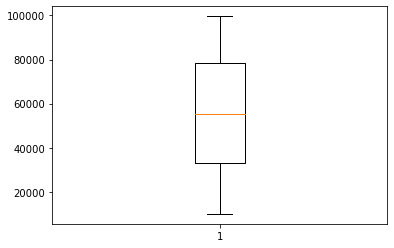

In [4]:
plt.boxplot(df['Taxable.Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x27758867970>,
 'caps': [<matplotlib.lines.Line2D at 0x277588740d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x277588675e0>],
 'medians': [<matplotlib.lines.Line2D at 0x277588747f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27758874b80>],
 'means': []}

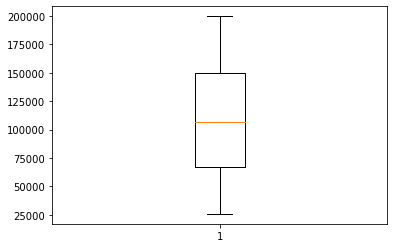

In [5]:
plt.boxplot(df['City.Population'])

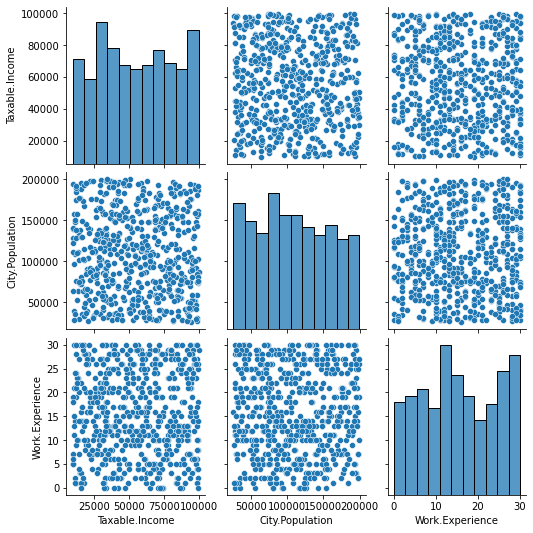

In [6]:
sns.pairplot(df)

In [7]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
df.columns=['u_grad','m_stat','t_inc','c_pop','w_exp','urban']
df.head()

,u_grad,m_stat,t_inc,c_pop,w_exp,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [10]:
bins=[0,30000,200000]
labels=['risky','good']
df['binned']=pd.cut(df['t_inc'],bins=bins,labels=labels)
df

,u_grad,m_stat,t_inc,c_pop,w_exp,urban,binned
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


In [11]:
#label encoding categorical data
le=preprocessing.LabelEncoder()
df['u_grad']=le.fit_transform(df['u_grad'])
df['urban']=le.fit_transform(df['urban'])
df['m_stat']=le.fit_transform(df['m_stat'])
df['binned']=le.fit_transform(df['binned'])
df

,u_grad,m_stat,t_inc,c_pop,w_exp,urban,binned
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [23]:
#Normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(df.loc[:,('t_inc','c_pop','w_exp')])
df.loc[:,('t_inc','c_pop','w_exp')]= scaler.transform(df.loc[:,('t_inc','c_pop','w_exp')])
df

,u_grad,m_stat,t_inc,c_pop,w_exp,urban,binned
0,0.0,1.0,0.656468,0.139472,0.333333,1.0,0.0
1,1.0,0.0,0.264428,0.622394,0.600000,1.0,0.0
2,0.0,0.5,0.300415,0.772568,1.000000,1.0,0.0
3,1.0,1.0,0.448436,0.962563,0.500000,1.0,0.0
4,0.0,0.5,0.792258,0.010081,0.933333,0.0,0.0
...,...,...,...,...,...,...,...
595,1.0,0.0,0.740236,0.078811,0.233333,1.0,0.0
596,1.0,0.0,0.669122,0.170058,0.066667,1.0,0.0
597,0.0,0.0,0.416566,0.737240,0.000000,1.0,0.0
598,1.0,0.5,0.988540,0.886810,0.566667,0.0,0.0


In [24]:
df.corr()

,u_grad,m_stat,t_inc,c_pop,w_exp,urban,binned
u_grad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267,0.012523
m_stat,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562,0.006081
t_inc,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628,-0.688725
c_pop,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098,0.012225
w_exp,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559,-0.001972
urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000,0.004830
binned,0.012523,0.006081,-0.688725,0.012225,-0.001972,0.004830,1.000000


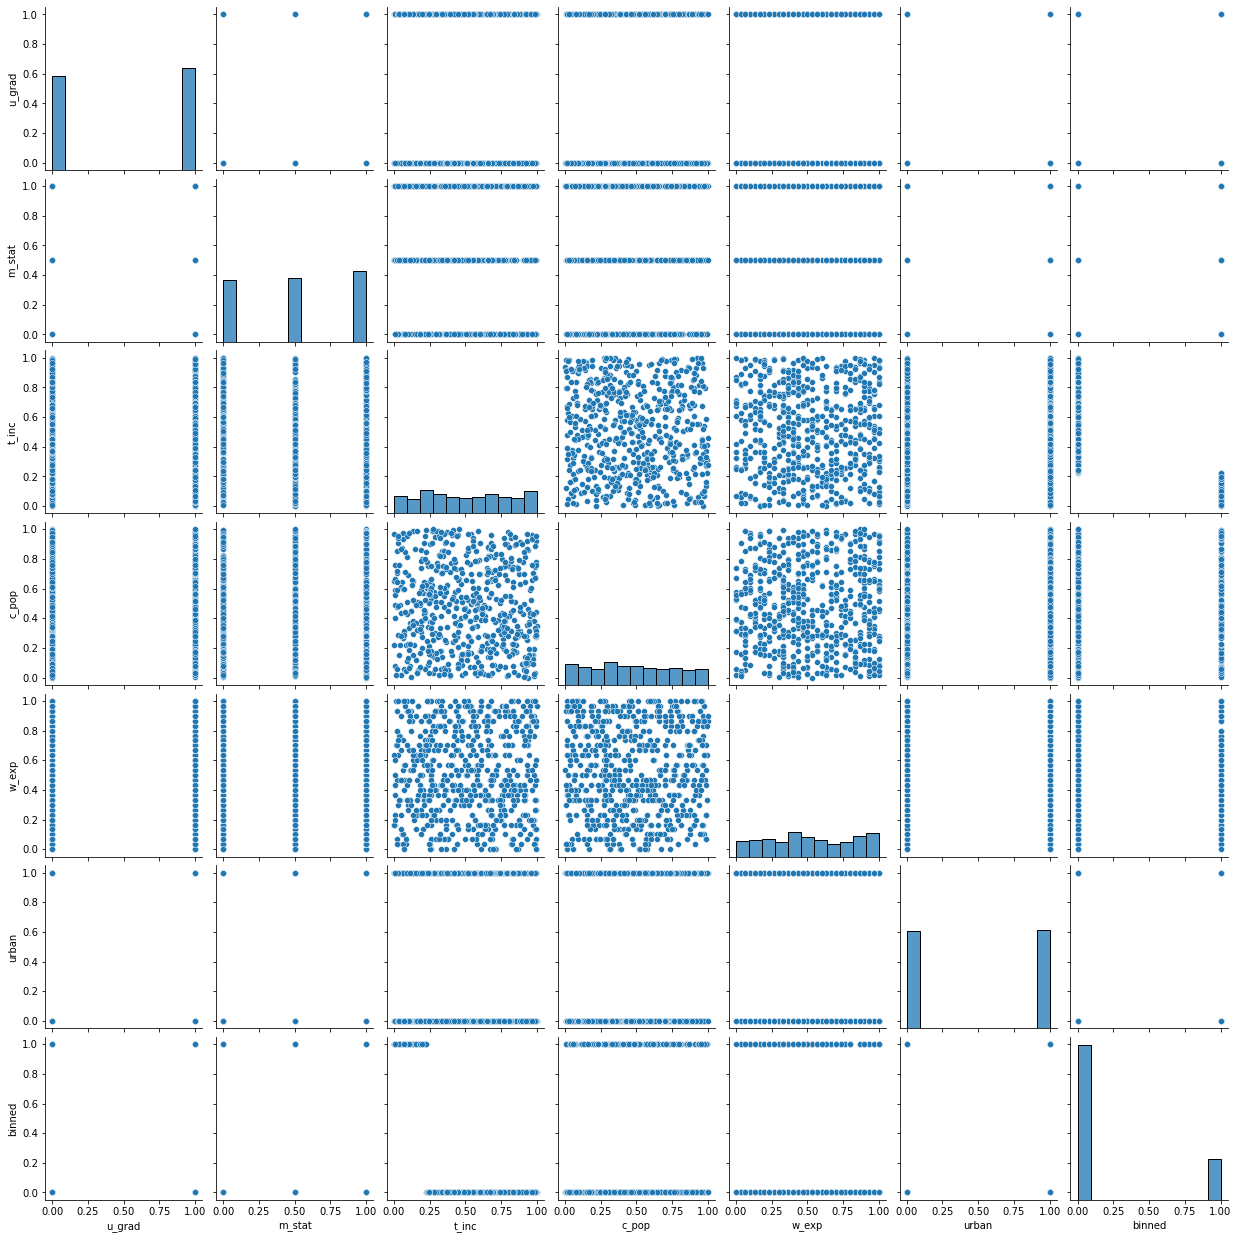

In [14]:
sns.pairplot(df)

In [27]:
#defining independent and dependent variables
x=df.loc[:,('u_grad','m_stat','c_pop','w_exp','urban')]
y=df['binned']


In [28]:
#splitting data into train and test data
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [45]:
#building decision tree using entropy criteria
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

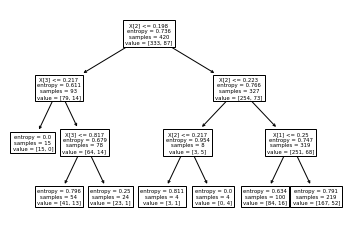

In [46]:
#plotting the tree
tree.plot_tree(model);

In [47]:
#predicting on test data
preds=model.predict(x_test)
preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
#getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0.0,1.0
binned,,
0.0,142,1
1.0,37,0


In [49]:
np.mean(preds==y_test)

0.7888888888888889

In [50]:
#decision tree model is not found to be satisfied in solving the problem. 